In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
data='/oak/stanford/groups/smontgom/moqri/data/meth/'
data_rna='/oak/stanford/groups/smontgom/moqri/data/rna/'
sperm450='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE139nnn/GSE139307/matrix/GSE139307_series_matrix.txt.gz'
hsc_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE31nnn/GSE31848/matrix/GSE31848_series_matrix.txt.gz'
hsc2_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE59nnn/GSE59091/matrix/GSE59091_series_matrix.txt.gz'
liver_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE48nnn/GSE48325/matrix/GSE48325_series_matrix.txt.gz'
wb_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE40nnn/GSE40279/matrix/GSE40279_series_matrix.txt.gz'
t_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56581/suppl/GSE56581_methylome_normalized.txt.gz'
t_meta='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56581/matrix/GSE56581_series_matrix.txt.gz'
m_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56046/suppl/GSE56046_methylome_normalized.txt.gz'
m_meta='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56046/matrix/GSE56046_series_matrix.txt.gz'
buc_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE137nnn/GSE137503/matrix/GSE137503-GPL13534_series_matrix.txt.gz'
mus_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE50nnn/GSE50498/matrix/GSE50498_series_matrix.txt.gz'
hsc_rna_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE73nnn/GSE73211/suppl/GSE73211_nonisogenic.TPM.txt.gz'
hsc_rna_meta='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE73nnn/GSE73211/matrix/GSE73211_series_matrix.txt.gz'
hsr_file='https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE126488&format=file'
gtex='https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz'

In [2]:
#!wget {gtex} -O {data_rna}gtex.gz

In [3]:
#!gzip -d {data_rna}gtex.gz

In [4]:
def get_data():
    !wget -q -nc "{hsr_file}" -O {data_rna}hsr.tar
    !tar -xf {data_rna}hsr.tar -C {data_rna}hsr 
    !wget -q -nc {hsc_file} -O {data}hsc.txt.gz
    !gzip -d {data}hsc.txt.gz
    !wget -q -nc {hsc2_file} -O {data}hsc2.txt.gz
    !gzip -d {data}hsc2.txt.gz
    !wget -q -nc {wb_file} -O {data}wb.txt.gz
    !gzip -d {data}wb.txt.gz    
    !wget -q -nc {liver_file} -O {data}liver.txt.gz
    !gzip -d {data}liver.txt.gz
    !wget -q -nc {m_file} -O {data}mono.txt.gz
    !gzip -d {data}mono.txt.gz
    !wget -q -nc {t_file} -O {data}t.txt.gz
    !gzip -d {data}t.txt.gz    
#get_data()

In [53]:
hsr=pd.concat(ss,1)

In [59]:
hsr.corr().median().sort_values().head(10)

GSM3602466    0.651052
GSM3602469    0.666464
GSM3602468    0.708509
GSM3602467    0.780027
GSM3602463    0.833223
GSM4127839    0.854237
GSM3602461    0.897735
GSM4127828    0.902091
GSM3602460    0.906008
GSM4127827    0.906497
dtype: float64

In [63]:
hsr=hsr.set_index(hsr.index.rename('index'))
hsr.reset_index().to_feather(data_rna+'hsr.ft')

In [6]:
cols=pd.read_table(hsc_rna_file,nrows=0,sep=' ')
cols=cols.columns.str.strip('ID\t')
meta=pd.read_table(hsc_rna_meta,skiprows=46).T
meta=meta.loc[cols]
meta=meta[meta[6]=='ESC'].index
df=pd.read_table(hsc_rna_file,skiprows=1,header=None,index_col=0)
df.columns=cols
esr=df[meta]

In [12]:
esr=esr.set_index(esr.index.rename('index'))
esr.reset_index().to_feather(data_rna+'esr.ft')

(37, 485513)


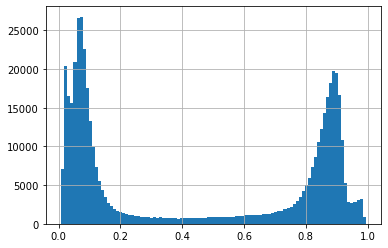

In [5]:
sperm=pd.read_csv(sperm450, index_col=0,sep='\t', skiprows=78)
sp=sperm.T
print(sp.shape)
sp.mean().hist(bins=100)
sp=sp.set_index(sp.index.rename('index'))
sp.reset_index().to_feather(data+'sp.ft')

(23, 485577)


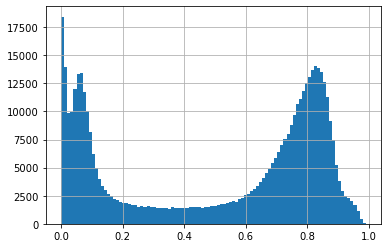

In [3]:
#ips
hsc=pd.read_table(data+'hsc.txt',skiprows=92,index_col=0)
hsc_meta=pd.read_table(data+'hsc.txt',skiprows=52,nrows=20,index_col=0)
hsc=hsc[hsc_meta[[c for c in hsc_meta.columns if 'iPS__HDF' in c]].iloc[0].values].drop('!series_matrix_table_end').T
print(hsc.shape)
hsc.mean().hist(bins=100)
hsc=hsc.set_index(hsc.index.rename('index'))
hsc.reset_index().to_feather(data+'ips.ft')

(19, 485577)


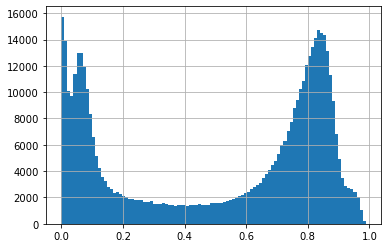

In [67]:
hsc=pd.read_table(data+'hsc.txt',skiprows=92,index_col=0)
hsc_meta=pd.read_table(data+'hsc.txt',skiprows=52,nrows=20,index_col=0)
hsc=hsc[hsc_meta[[c for c in hsc_meta.columns if 'ES__' in c]].iloc[0].values].drop('!series_matrix_table_end').T
print(hsc.shape)
hsc.mean().hist(bins=100)
hsc=hsc.set_index(hsc.index.rename('index'))
hsc.reset_index().to_feather(data+'hsc.ft')

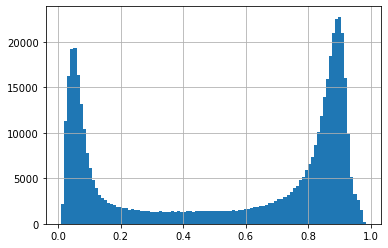

In [66]:
hsc=pd.read_table(data+'hsc2.txt',skiprows=26+38,index_col=0)
meta=pd.read_table(data+'hsc2.txt',skiprows=26,index_col=0,nrows=1)
hsc=hsc[meta[[c for c in meta.columns if 'ESC-' in c]].iloc[0].values]
hsc=hsc.T
hsc.mean().hist(bins=100)
hsc=hsc.set_index(hsc.index.rename('index'))
hsc.reset_index().to_feather(data+'hsc2.ft')

In [ ]:
hsc=pd.read_table(data+'hsc2.txt',skiprows=92,index_col=0)
hsc_meta=pd.read_table(data+'hsc.txt',skiprows=52,nrows=20,index_col=0)
hsc=hsc[hsc_meta[[c for c in hsc_meta.columns if 'ES__' in c]].iloc[0].values].drop('!series_matrix_table_end').T
print(hsc.shape)
hsc.mean().hist(bins=100)
hsc=hsc.set_index(hsc.index.rename('index'))
hsc.reset_index().to_feather(data+'hsc.ft')

In [11]:
wb=pd.read_table(data+'wb.txt',skiprows=69,index_col=0)
wb=wb.drop('!series_matrix_table_end').T
print(wb.shape)
wb.mean().hist(bins=100)
wb_ages=pd.read_table(data+'wb.txt',skiprows=33,nrows=0,index_col=0).columns.values
wb_ages=[float(age.strip('age: ').split('y')[0]) for age in wb_ages]
wb['age']=wb_ages
wb.age.hist(bins=50)
wb.reset_index().to_feather(data+'wb.ft')

In [ ]:
li=pd.read_csv(data+'liver.txt', index_col=0,sep='\t', skiprows=60)
li=li.drop('!series_matrix_table_end').T
print(li.shape)
li.mean().hist(bins=100)
li_ages=pd.read_csv(data+'liver.txt', index_col=0,sep='\t', skiprows=27,nrows=9).iloc[8].str.strip('age: ').astype(float)
li['age']=li_ages
li.age.hist(bins=50)
li.reset_index().to_feather(data+'liver.ft')

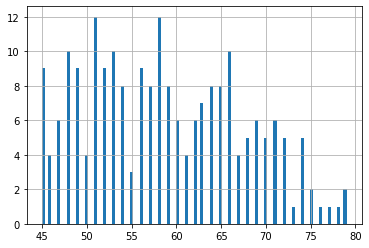

In [44]:
t=pd.read_table(t_file,index_col=0)
t=t[[c for c in t.columns if 'Mvalue' in c]]
t=(2**t)/(1+2**t)
ages=pd.read_table(t_meta,index_col=0,skiprows=39).iloc[10].str.strip('age \(yrs\): ').astype(int)
t=t.T
t['age']=ages.values
t.age.hist(bins=100)
t.reset_index().to_feather(data+'t.ft')

In [34]:
m=pd.read_table(data+'mono.txt',index_col=0)
m=m[[c for c in m.columns if 'Mvalue' in c]]
m=(2**m)/(1+2**m)
ages=pd.read_table(m_meta,index_col=0,skiprows=44).iloc[10].str.strip('age \(yrs\): ').astype(int)
m=m.T
m['age']=ages.values
m.age.hist(bins=100)
m.reset_index().to_feather(data+'mono.ft')

In [ ]:
buc=pd.read_table(buc_file,index_col=0,skiprows=75)
buc=buc.drop('!series_matrix_table_end')
buc=buc.T

In [55]:
meta=pd.read_table(buc_file,index_col=0,skiprows=37,nrows=10).T
meta['age']=meta.apply(lambda x : x[9] if 'age' in x[9] else x[8],axis=1)
meta['age']=meta.age.str.strip('age: ').astype(float)
ages=meta.age.to_list()

In [56]:
buc['age']=ages

In [57]:
buc.reset_index().to_feather(data+'buc.ft')

In [45]:
mus=pd.read_table(mus_file,index_col=0,skiprows=76)
mus=mus.drop('!series_matrix_table_end')
mus=(2**mus)/(1+2**mus)
mus=mus.T

In [46]:
ages=pd.read_table(mus_file,index_col=0,skiprows=49,nrows=0).columns
ages=[float(age.strip('age: ')) for age in ages]

In [50]:
mus['age']=ages
mus.reset_index().to_feather(data+'mus.ft')

In [44]:
def predict():
    dd=[]
    for i in range(len(bl)):
        a=bl[p50.index].iloc[i].squeeze()
        d=np.linalg.norm(a-sc[p50.index])
        dd.append(d)
    bl['d']=dd
    bl.plot.scatter('age','d')    

In [ ]:
#man=pd.read_csv(data+'man450.csv',index_col=0,low_memory=False,skiprows=7)
#man=man[~man.CHR.isna()][man.CHR!='X'][man.CHR!='Y']
#idx=sc.index.intersection(bl.columns).intersection(man.index)
#sc=sc.loc[idx]

In [54]:
!ls {data} -alhS

total 29G
-rw-rw----+ 1 moqri oak_smontgom  11G Mar 19  2014 mono.txt
-rw-rw----+ 1 moqri oak_smontgom 4.6G Jul  9 10:12 mono.ft
-rw-rw----+ 1 moqri oak_smontgom 3.0G Jun 21 15:47 wb.txt
-rw-rw----+ 1 moqri oak_smontgom 2.5G Jul  7 17:14 wb.ft
-rw-rw----+ 1 moqri oak_smontgom 1.9G Apr  7  2014 t.txt
-rw-rw----+ 1 moqri oak_smontgom 1.5G Jul  9 11:07 buc.ft
-rw-rw----+ 1 moqri oak_smontgom 987M Jul  9 10:23 t.ft
-rw-rw----+ 1 moqri oak_smontgom 723M Jun 22 02:21 hsc.txt
-rw-rw----+ 1 moqri oak_smontgom 698M Jul  9 17:55 CHOL.methylation__humanmethylation450__jhu_usc_edu__Level_3__within_bioassay_data_set_function__data.data.txt
-rw-rw----+ 1 moqri oak_smontgom 511M Jul  7 17:52 liver.ft
-rw-rw----+ 1 moqri oak_smontgom 405M Jun 21 09:21 liver.txt
-rw-rw----+ 1 moqri oak_smontgom 372M Jul  9 16:40 mus.ft
-rw-rw----+ 1 moqri oak_smontgom 331M Jul  9 10:29 sp.ft
-rw-rw----+ 1 moqri oak_smontgom 264M Jul  7 17:29 hsc.ft
-rw-rw----+ 1 moqri oak_smontgom 188M Feb 13  2016 CHOL.tar.gz
-rw-rw--